In [39]:
# cloning yolo v5 repo
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [40]:
# & requirements
!pip install -U -r yolov5/requirements.txt

In [41]:
# setting up yolo v5
%cd yolov5
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [43]:
# grabbing weights & biases
# wandb_api_key is personal key
%pip install -q wandb
import wandb
wandb.login(key=WANDB_API_KEY)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [51]:
# train on data, epochs = 50
!python train.py --img 640 --batch 16 --epochs 50 --data ../data.yaml --weights yolov5s6.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: anishac-0701 (anishac). Use `wandb login --relogin` to force relogin
train: weights=yolov5s6.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

In [49]:
# run it on test data
!python detect.py --weights runs/train/exp/weights/best.pt --img 1280 --conf 0.5 --source ../test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 206 layers, 12308200 parameters, 0 gradients, 16.1 GFLOPs
image 1/19 /content/yolov5/yolov5/test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg: 1280x1280 (no detections), 35.5ms
image 2/19 /content/yolov5/yolov5/test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg: 1280x1280 (no detections), 35.6ms
image 3/19 /content/yolov5/yolov5/test/images/019_png.rf.1930cd277f9bf0e3fa

(640, 640, 3)


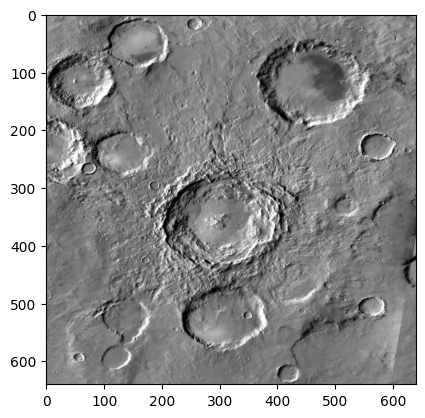

(640, 640, 3)


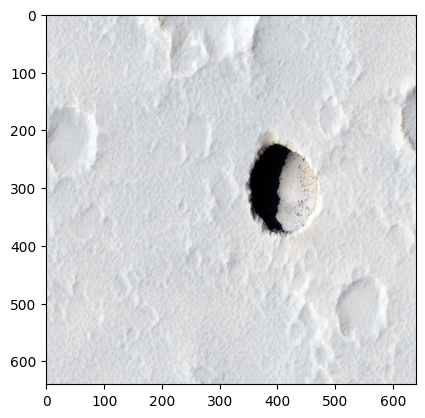

(640, 640, 3)


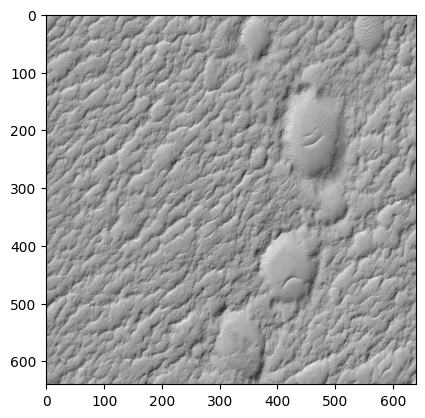

(640, 640, 3)


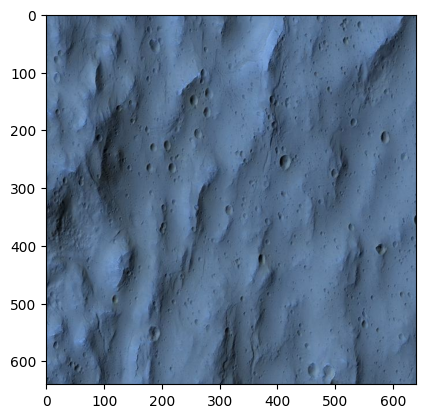

(640, 640, 3)


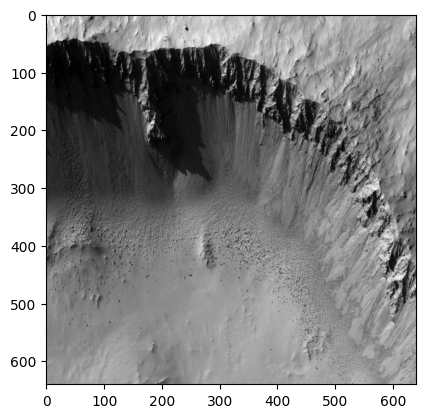

(640, 640, 3)


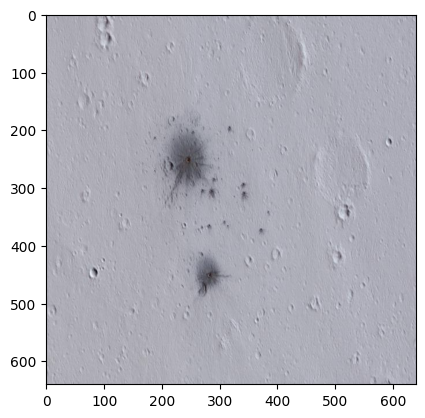

(640, 640, 3)


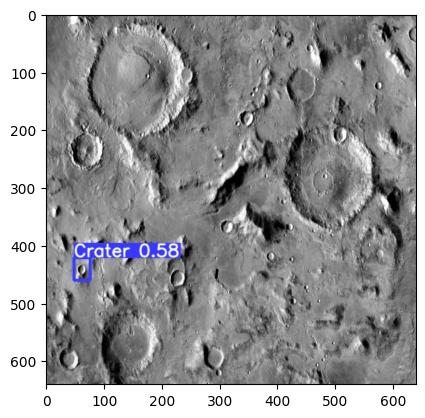

(640, 640, 3)


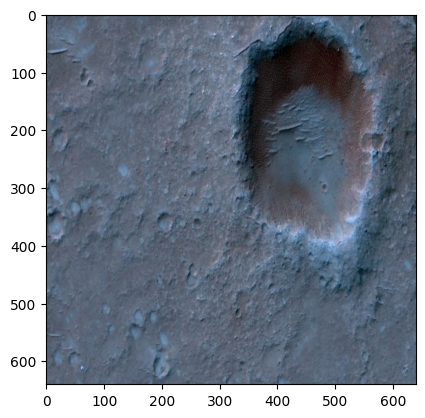

(640, 640, 3)


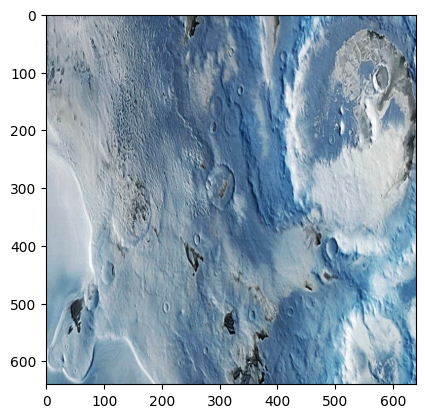

(640, 640, 3)


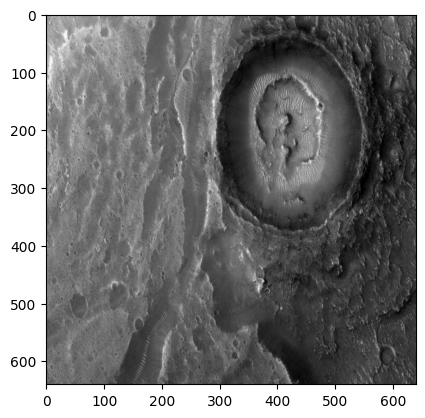

(640, 640, 3)


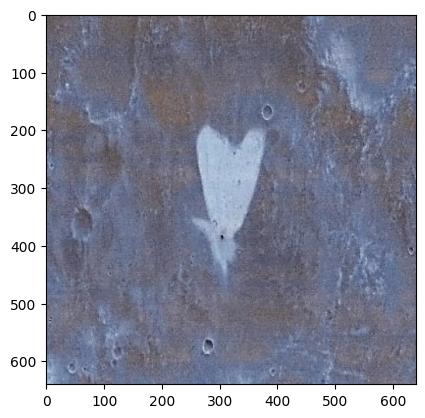

(640, 640, 3)


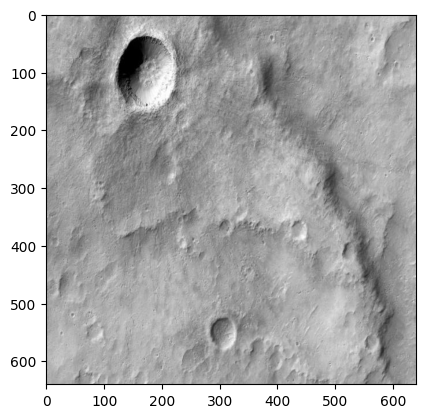

(640, 640, 3)


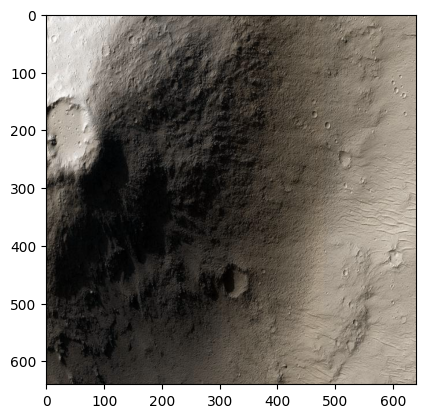

(640, 640, 3)


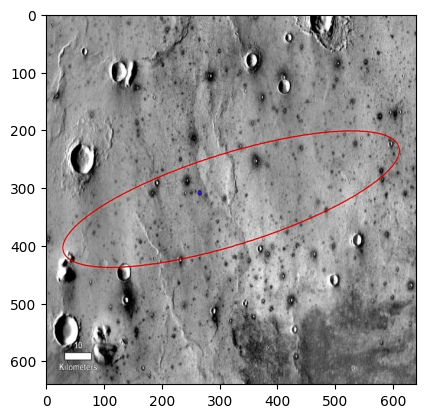

(640, 640, 3)


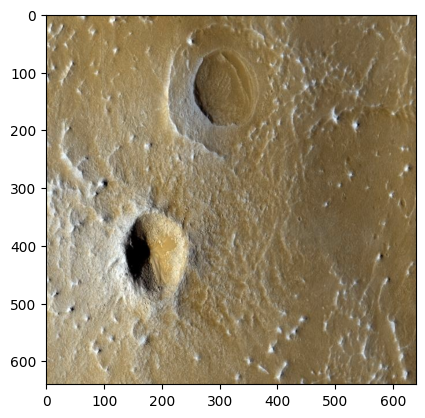

(640, 640, 3)


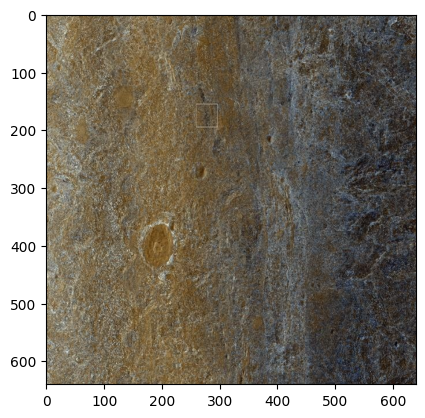

(640, 640, 3)


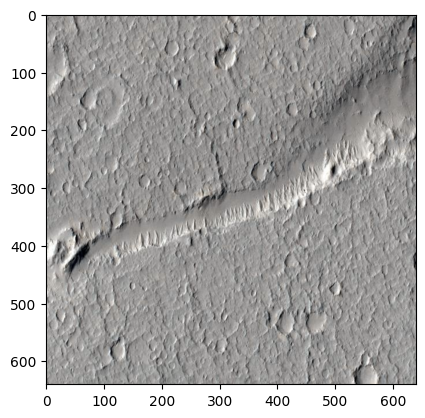

(640, 640, 3)


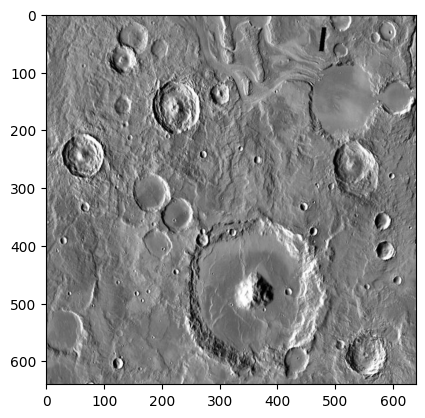

(640, 640, 3)


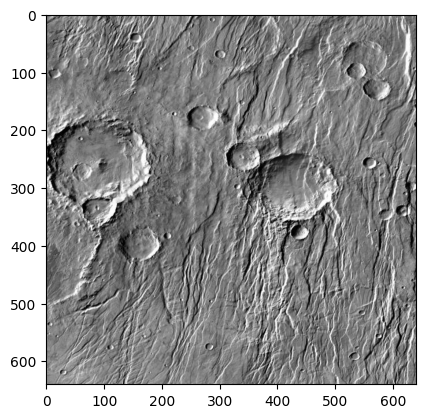

In [58]:
# visualize the results
import os
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt


for image in os.listdir('runs/detect/exp4'):
  img = cv2.imread(os.path.join('runs/detect/exp4', image))
  print(img.shape)
  plt.imshow(img)
  plt.show()